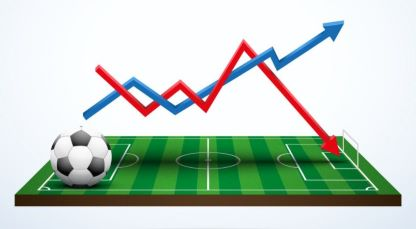

## Projeto Estatística Aplicada - Fase 01

Importe de Bibliotecas usadas nesse Projeto.



In [100]:
ini <- Sys.time()
install.packages(c('skimr','tidyverse'), dep = TRUE)
Sys.time()-ini
library(skimr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Time difference of 10.11456 secs

**Leitura dos dados do arquivo Fifa World**

In [101]:
# Lendo e armazenando o arquivo para a variável
dados <- '/Anexo_Projeto_fifa_world_national_teams_versão_oficial 20241.csv'

In [102]:
# Validação dos cabelhaços para melhor leitura dos dados posteriormente

#Lendo as primeiras linhas do arquivo
linhas_iniciais <- readLines(dados, n = 2)
print(linhas_iniciais)

# Garantindo a leitura do arquivo com ou sem cabeçalho
if (header_presente) {
  dados_ <- read.csv2(dados, header = TRUE)
} else {
  dados_ <- read.csv2(dados, header = FALSE)

  # Etapa de validação do cabeçalho: definindo os nomes das colunas manualmente
  cn <- c("id", "name", "full_name", "overall_rating", "value_euro", "wage_euro",
          "nationality", "national_team", "club_team", "age", "height_cm",
          "weight_kgs", "international")

  if (length(cn) == ncol(dados_)) {
    colnames(dados_) <- cn
  } else {
    stop("O número de nomes de colunas não corresponde ao número de colunas no dataframe.")
  }
}

# Verificando a estrutura dos dados
str(dados_)


[1] "id;name;full_name;overall_rating;value_euro;wage_euro;nationality;national_team;club_team;age;height_cm;weight_kgs;international_reputation(1-5);weak_foot(1-5);skill_moves(1-5);club_rating;Goleiro;Zagueiro;Meio;Atacante;crossing;finishing;heading_accuracy;short_passing;dribbling;jumping;strength;long_shots;aggression;GK_reflexes"
[2] "158023;Messi;Lionel Andr\xe9s Messi Cuccittini;94;110500000;565000;Argentina;Argentina;FC Barcelona;31;170;72;5;4;4;86;0;0;0;1;86;95;70;92;97;68;66;94;48;8"                                                                                                                                                                               
'data.frame':	718 obs. of  30 variables:
 $ id                           : int  158023 153079 211110 201399 226226 199667 212616 216816 183892 231478 ...
 $ name                         : chr  "Messi" "Aguero" "Dybala" "Icardi" ...
 $ full_name                    : chr  "Lionel Andr\xe9s Messi Cuccittini" "Sergio Leonel Ag\x

Foi confirmado que todas as variáveis estão com os seus repectivos tipos corretos sem precisar de alterações.


# Encontrando e listando uma variável para cada tipo estatístico.

*   Variável qualitativa nominal: 'name'
*   Variável qualitativa ordinal: 'international_reputation.1.5.'
*   Variável quantitativa discreta: 'age'
*   Variável quantitativa contínua: 'height_cm'








**Tabela de frequências para as variáveis qualitativas 'name' e 'international_reputation.1.5'**

---



In [103]:
var_qlt <- c("name", "international_reputation.1.5.")


In [104]:
table_qlt <- sapply(dados_[, var_qlt], function(col) table(col, useNA ='always'))
print(table_qlt)

$name
col
           ?ezn\xedk               Acerbi                Adams 
                   1                    1                    1 
        Adv\xedncula               Aguero                 Ajer 
                   1                    1                    1 
              Akanji             Akindele             Akinfeev 
                   1                    1                    1 
               Akkan               Ak\xe9                Alaba 
                   1                    1                    1 
        Alderweireld             Aleesami     Alexander-Arnold 
                   1                    1                    1 
               Allen                 Alli             Altidore 
                   1                    1                    1 
               Amini               Ampadu               Angban 
                   1                    1                    1 
            Arajuuri            Ara\xfajo               Areola 
                   1          

**Tabela de medidas de posição e variabilidade das seguintes variáveis:**

*   overall_rating
*   value_euro
*   age
*   international_reputation.1.5.
*   dribbling


In [105]:
vars <- c("overall_rating","value_euro","age","international_reputation.1.5.","dribbling")

In [106]:
summary(dados_[, vars])

 overall_rating    value_euro             age       
 Min.   :58.00   Min.   :   230000   Min.   :18.00  
 1st Qu.:72.00   1st Qu.:  3325000   1st Qu.:24.00  
 Median :76.00   Median :  8000000   Median :26.00  
 Mean   :76.46   Mean   : 13897695   Mean   :26.57  
 3rd Qu.:80.00   3rd Qu.: 17000000   3rd Qu.:29.00  
 Max.   :94.00   Max.   :110500000   Max.   :37.00  
 international_reputation.1.5.   dribbling    
 Min.   :1.000                 Min.   : 7.00  
 1st Qu.:1.000                 1st Qu.:60.25  
 Median :1.000                 Median :70.00  
 Mean   :1.673                 Mean   :64.40  
 3rd Qu.:2.000                 3rd Qu.:77.00  
 Max.   :5.000                 Max.   :97.00  

In [107]:
# Visão geral do conjunto de dados
skimr::skim(dados_)

Warning message:
“There was 1 warning in `dplyr::summarize()`.
ℹ In argument: `dplyr::across(tidyselect::any_of(variable_names),
  mangled_skimmers$funs)`.
ℹ In group 0: .
Caused by warning:
! There were 307 warnings in `dplyr::summarize()`.
The first warning was:
ℹ In argument: `dplyr::across(tidyselect::any_of(variable_names),
  mangled_skimmers$funs)`.
Caused by warning in `grepl()`:
! unable to translate 'Mart<ed>nez' to a wide string
ℹ Run `dplyr::last_dplyr_warnings()` to see the 306 remaining warnings.”


── Data Summary ────────────────────────
                           Values
Name                       dados_
Number of rows             718   
Number of columns          30    
_______________________          
Column type frequency:           
  character                5     
  numeric                  25    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 name                  0             1   2  16     0      687          0
2 full_name             0             1   8  42     0      718          0
3 nationality           0             1   4  19     0       45          0
4 national_team         0             1   4  19     0       45          0
5 club_team             0             1   3  29     0      227          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_var

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


**Construção dos gráficos para melhor visualização dos resultados.**

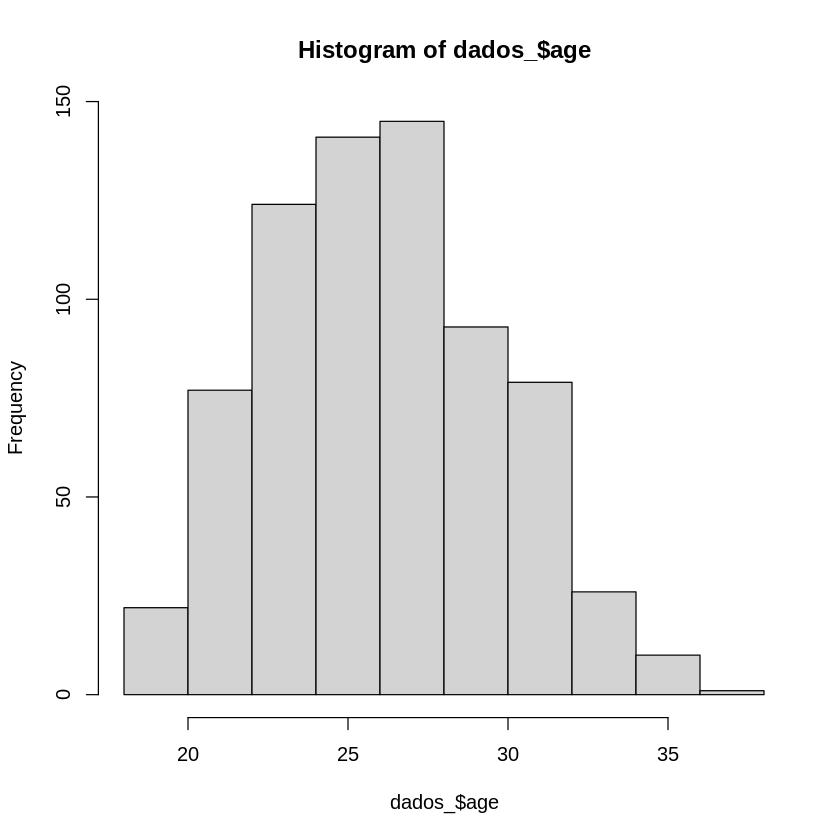

Média =  26.56546


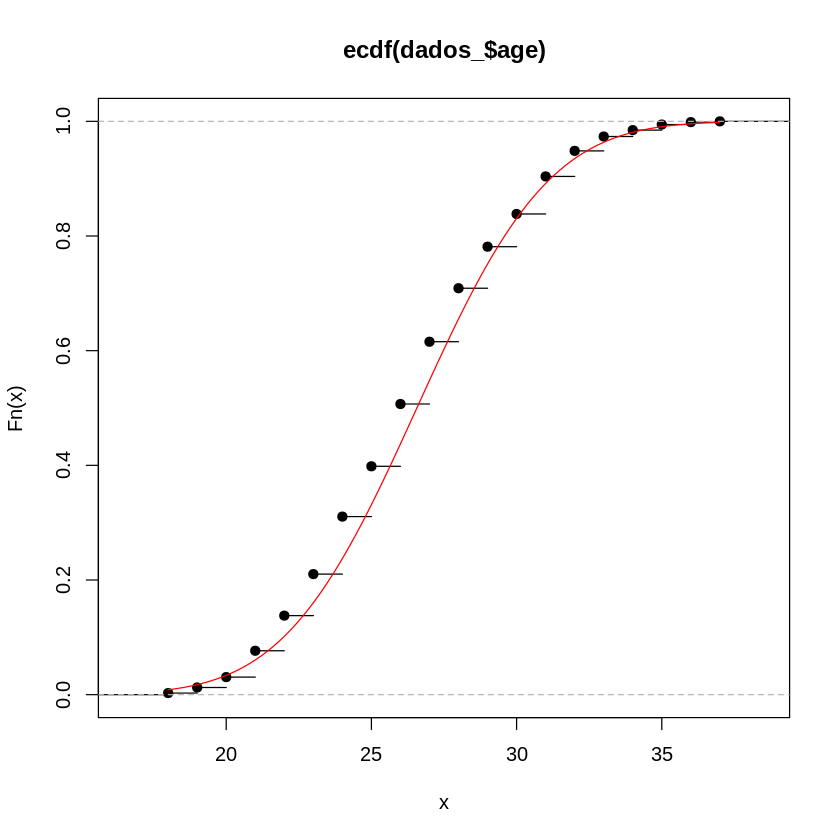

In [108]:
# Visualizando em gráficos a média de idade dos jogadores usando a variável 'age'.
hist(dados_$age)
cs <- ecdf(dados_$age)
plot(cs)
media <- mean(dados_$age)
cat('Média = ', media)
cat('\n')
curve(pnorm(x,media,desvio), min(dados_$age), max(dados_$age), add = TRUE, col = 'red')

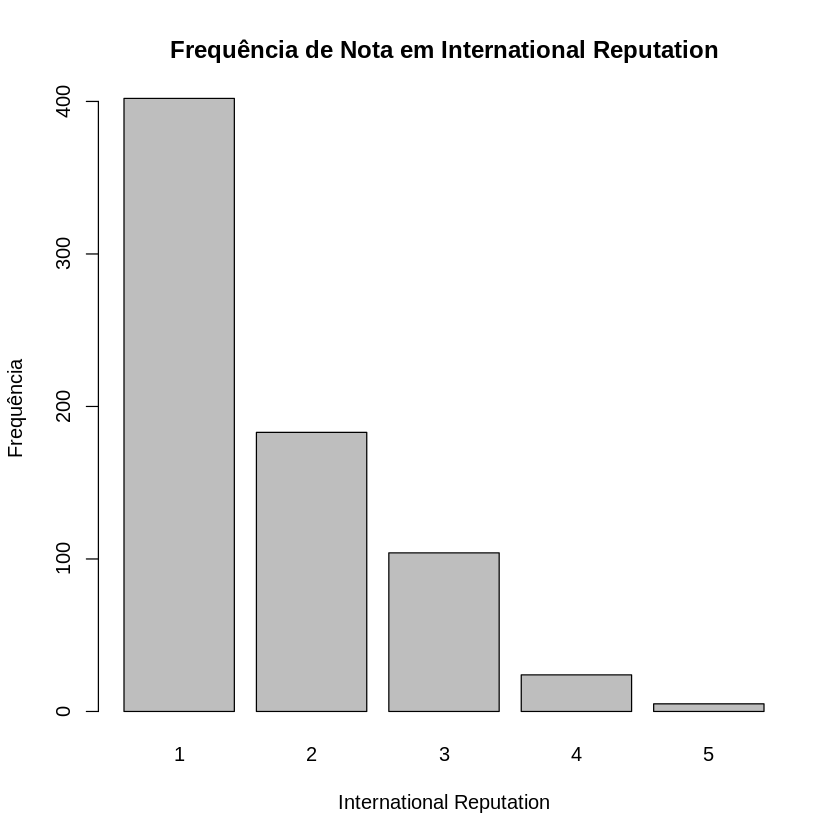

In [109]:
# Visualização em gráfico da frequência das notas obtidas na variável international_reputation
barplot(table(dados_$international_reputation.1.5.), main = 'Frequência de Nota em International Reputation',
        xlab = 'International Reputation', ylab = 'Frequência')

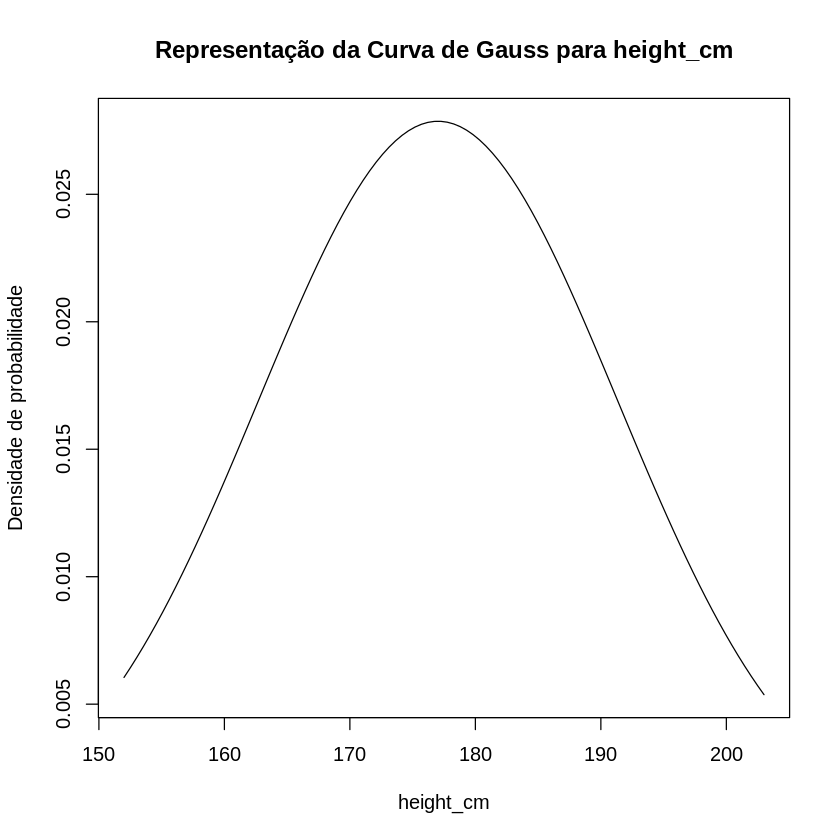

In [110]:
# Visualização em gráfico para a variável height_cm
# Criando a sequência de valores para a variável com mínimo, máximo e comprimento
valores_height <- seq(min(dados_$height_cm), max(dados_$height_cm), length.out = 100)

# Calculando a densidade de probabilidade para a distribuição normal
densidade_normal <- dnorm(valores_height, mean = mean(dados_$height_cm), sd = sd(dados_$height_cm))

# Gráfico
plot(valores_height, densidade_normal, type = "l",
     main = "Representação da Curva de Gauss para height_cm",
     xlab = "height_cm", ylab = "Densidade de probabilidade")